In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.collections import LineCollection
from pycaret.anomaly import *

In [92]:
# normal = pd.read_csv('normal.csv')
# normal['Time'] = normal['Time'].apply(math.floor)
# normal = normal[['No.','Time']].to_numpy()
# attack_time = []
# data = normal
# time = len(np.unique(data[:,1]))
# pkt = []

In [93]:
normal = pd.read_csv('raw_normal3.csv')
normal = normal[['attack','time']].to_numpy()
attack_time = []
data = normal
time = len(np.unique(data[:,1]))
pkt = []

In [94]:
for i in range(time):
    pkt.append([i,np.count_nonzero(data[:,1] == i)])
    
pkt = np.asarray(pkt)
print(pkt)

[[   0   10]
 [   1    4]
 [   2   14]
 ...
 [9421   15]
 [9422   15]
 [9423   15]]


In [95]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [96]:
smooth_pkt = pkt.copy()
smooth_pkt[:,1] = smooth(smooth_pkt[:,1],10)
smooth_pkt = smooth_pkt[3400:-50,:]
pkt = pkt[3400:-50,:]

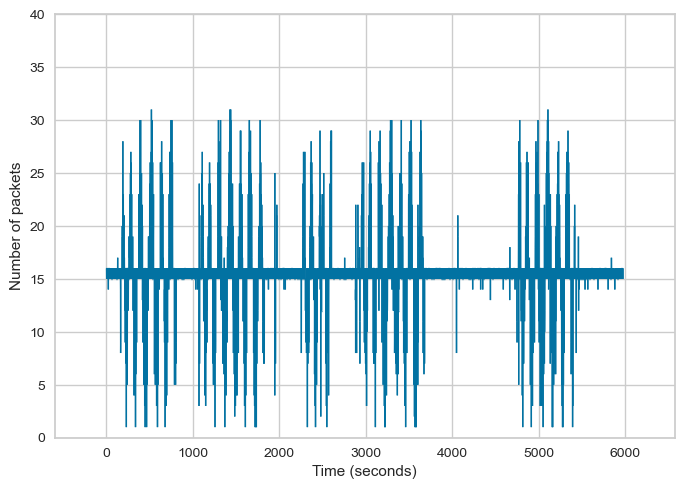

In [97]:
x = range(len(pkt))
y = pkt[:,1]
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

cm = dict(zip(range(0,2,1),list("br")))
colors = list( map( cm.get , np.isin(x,attack_time) ))

lc = LineCollection(segments, colors=colors, linewidths= 1)
fig, ax = plt.subplots()
ax.add_collection(lc)

ax.autoscale()
ax.margins(0.1)
plt.xlabel('Time (seconds)')
plt.ylabel('Number of packets')
plt.ylim(0,40)
plt.show()

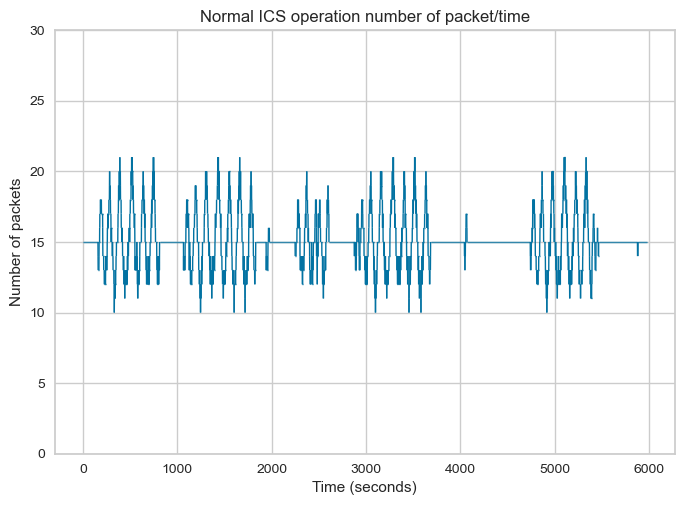

In [98]:
x = range(len(smooth_pkt))
y = smooth_pkt[:,1]
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

cm = dict(zip(range(0,2,1),list("br")))
colors = list( map( cm.get , np.isin(x,attack_time) ))

lc = LineCollection(segments, colors=colors, linewidths= 1)
fig, ax = plt.subplots()
ax.add_collection(lc)

ax.autoscale()
ax.margins(y=1)
plt.xlabel('Time (seconds)')
plt.ylabel('Number of packets')
plt.title('Normal ICS operation number of packet/time')
plt.ylim(0,30)
plt.savefig('plot/baseline/baseline_pkt_entropy.pdf')
plt.show()

In [13]:
data = pd.read_csv('plc_normal.csv').to_numpy()
data = data[:2500,:]
attack_time = []

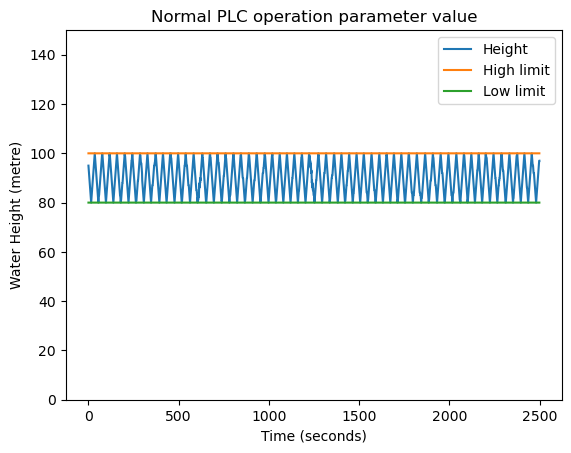

In [9]:
x = range(len(data))
height = data[:,0]
high = data[:,3]
low = data[:,4]

plt.plot(x, height, label = "Height")
plt.plot(x, high, label = "High limit")
plt.plot(x, low, label = "Low limit")

plt.xlabel('Time (seconds)')
plt.ylabel('Water Height (metre)')
plt.legend()
plt.ylim(0,150)
plt.title('Normal PLC operation parameter value')
plt.savefig('plot/baseline/baseline_plc.pdf')
plt.show()